# Predicting Used Car Price Depreciation 🚗

In this challenge, we will try to **predict the price depreciation of used cars**, based on information such as the *age of the car*, its *price if it was new* or the *number of kilometers it completed*...

## Load Python Libraries

Run the cell below to `import` some Python libraries - these will be our tools for working with data 📊

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

--------------

## Load the Dataset

Run below cell to read the `CSV` file into a `DataFrame` - a format that is great for data analysis inside Python!

*Note: the dataset has been cleaned and federated for learning purposes*

In [3]:
cars = pd.read_csv('https://storage.googleapis.com/introduction-to-data-science/car-prices.csv')
cars

,Car_Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,depreciation
0,4,5.59,2.7000,1,0,1,0.400716
1,5,9.54,4.3000,0,0,1,0.502096
2,1,9.85,0.6900,1,0,1,0.263959
3,7,4.15,0.5200,1,0,1,0.313253
4,4,6.87,4.2450,0,0,1,0.330422
...,...,...,...,...,...,...,...
293,2,11.60,3.3988,0,0,1,0.181034
294,3,5.90,6.0000,1,0,1,0.322034
295,9,11.00,8.7934,1,0,1,0.695455
296,1,12.50,0.9000,0,0,1,0.080000


This dataset contains information about used cars listed on www.cardekho.com

The *columns* in the given dataset are as follows:

*Features:*
- **Car_Age**: number of years since the car was bought
- **Present_Price**: the current price of the car out of the factory (in k€)
- **Kms_Driven**: the distance completed by the car (10,000 km)
- **Fuel_Type**: whether the fuel type is Diesel (0) or Petrol (1)
- **Seller_Type**: whether the seller is a dealer (0) or an individual (1)
- **Transmission**: whether the car is automatic (0) or manual (1)

*Target:*
- **depreciation**: % of price decrease between the price the car was sold for and the **Present_Price**

*source: [Kaggle](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)*

--------------

## We can get a lot of insight without ML! 🤔

### Your turn! 🚀

Let's start by **understanding the data we have** - how big is the dataset, what is the information (columns) we have and so on:

**💡 Tip:** remember to check the slides for the right methods ;)

In [4]:
# your code here
cars.shape # to see how many rows, columns
cars.dtypes # to see available columns and their data type
cars.describe() # to see a readable summary about the dataset, like averages, minimums and maximums

,Car_Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,depreciation
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,4.348993,7.660470,3.535440,0.798658,0.352349,0.869128,0.363680
std,2.882494,8.676554,2.832653,0.401678,0.478506,0.337828,0.202061
min,0.000000,0.320000,0.050000,0.000000,0.000000,0.000000,0.010745
25%,2.000000,1.215000,1.500000,1.000000,0.000000,1.000000,0.209098
50%,4.000000,6.445000,3.180200,1.000000,0.000000,1.000000,0.343821
75%,6.000000,9.900000,4.775000,1.000000,1.000000,1.000000,0.493553
max,15.000000,92.600000,21.300000,1.000000,1.000000,1.000000,0.894648


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
cars.shape # to see how many rows, columns
cars.dtypes # to see available columns and their data type
cars.describe() # to see a readable summary about the dataset, like averages, minimums and maximums
</pre>
</details>

Now try to **separate only some columns** - say we only want to see Present_Price, or Present_Price and Kms_Driven:

In [5]:
# your code here
cars["Present_Price"] # to see one column
cars[["Present_Price", "Kms_Driven"]] # double bracket if we want to see multiple columns

,Present_Price,Kms_Driven
0,5.59,2.7000
1,9.54,4.3000
2,9.85,0.6900
3,4.15,0.5200
4,6.87,4.2450
...,...,...
293,11.60,3.3988
294,5.90,6.0000
295,11.00,8.7934
296,12.50,0.9000


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
cars["Present_Price"] # to see one column
cars[["Present_Price", "Kms_Driven"]] # double bracket if we want to see multiple columns
</pre>
</details>

-------

### Your turn - Now let's do some **visualization** 📊.


Let's follow some basic intuition - **does the number of kilometers driven or the age of the car affect the depreciation of the car❓**

Let's use a [Seaborn Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) - a method inside the Seaborn library (which we imported above and shortened to `sns`) that gives us a graph with data points as dots with `x` and `y` values.

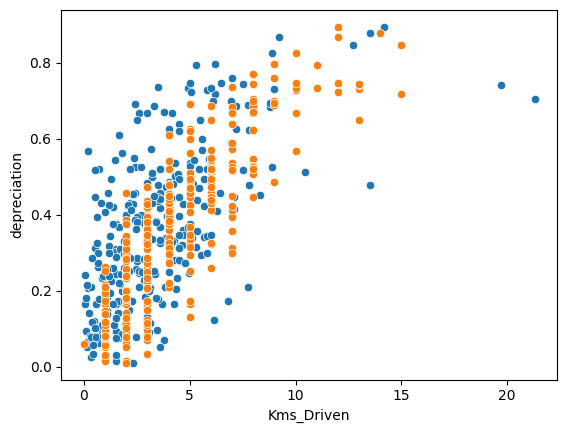

In [6]:
# your code here
sns.scatterplot(data=cars, x="Kms_Driven", y="depreciation");
sns.scatterplot(data=cars, x="Car_Age", y="depreciation");

<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
sns.scatterplot(data=cars, x="Kms_Driven", y="depreciation");
sns.scatterplot(data=cars, x="Car_Age", y="depreciation");
</pre>
</details>

Remember one of the questions from the slides - **do petrol car depreciate faster than diesel cars❓**

*Note: 'Diesel' is coded as 0, 'Petrol' - as 1*

<Axes: xlabel='Kms_Driven', ylabel='depreciation'>

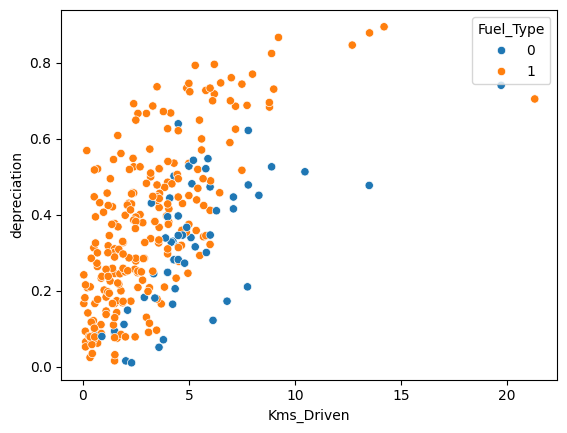

In [7]:
# your code here
sns.scatterplot(data=cars, x="Kms_Driven", y="depreciation", hue="Fuel_Type")

<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
sns.scatterplot(data=cars, x="Kms_Driven", y="depreciation", hue="Fuel_Type")
</pre>
</details>

Let's also understand the repartition we have for some categories - **how many professional dealers vs individual sellers❓** **How many  automatic vs manual transmission cars❓** Seaborn `countplot` is here to help with that.

**💡 Tip:** you can always call methods `.dtypes` or `.columns` on your dataset to check what columns you have.

*Note:*

*- Seller_Type: 'Dealer' is coded as 0, 'Individual' - as 1*

*- Transmission: 'Automatic' is coded as 0, 'Manual' - as 1*

<Axes: xlabel='Seller_Type', ylabel='count'>

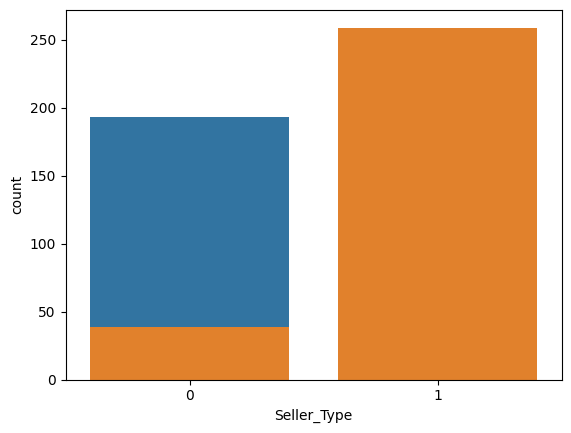

In [8]:
# your code here
sns.countplot(data=cars, x="Seller_Type") # to see how many of each type of sellers we have in the dataset
sns.countplot(data=cars, x="Transmission") # to see how many of each type of transmission we have

<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
sns.countplot(data=cars, x="Seller_Type") # to see how many of each type of sellers we have in the dataset
sns.countplot(data=cars, x="Transmission") # to see how many of each type of transmission we have
</pre>
</details>

**Bonus question:** can you visualize **how many manual and automatic cars there are per fuel type**? 🤔 A `hue` might help...

<Axes: xlabel='Fuel_Type', ylabel='count'>

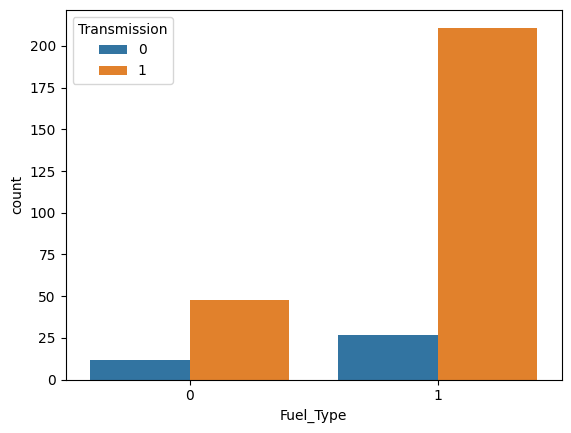

In [9]:
# your code here
sns.countplot(data=cars, x="Fuel_Type", hue="Transmission")


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
sns.countplot(data=cars, x="Fuel_Type", hue="Transmission")
</pre>
</details>

--------------

#### 🥈*A good data expert knows all the most complex models.*
### 🥇*A great data expert knows when results can be achieved without them.*

--------------

## Your first model - Linear Regression 📈

**1.** First, let's create what will be our...
  * Features and target
  * Inputs and output
  * X and Y

`car` for which we want to predict the depreciation!

In [12]:
# your code here
features = cars.drop(["depreciation"], axis="columns")
target = cars["depreciation"]


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
features = cars.drop(["depreciation"], axis="columns")
target = cars["depreciation"]
</pre>
</details>

Feel free to check what is in your `features` and `target` below:

In [ ]:
# your code here

--------------

**2.** Time to **import** the Linear Regression model

Python libraries like [Scikit-learn](https://scikit-learn.org/0.21/modules/classes.html) make it super easy for people getting into Data Science and ML to experiment.

The code is already in the library, it's just about **calling the right methods!** 🛠

In [13]:
# your code here
from sklearn.linear_model import LinearRegression


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
from sklearn.linear_model import LinearRegression
</pre>
</details>

Now to **initialize** the model

In [14]:
# your code here
model = LinearRegression()


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
model = LinearRegression()
</pre>
</details>

--------------

**3.** We **train** the model.

This is the process where the Linear Regression model looks for a line that best fits all the points in the dataset. This is the part where the computer is hard at work **learning**! 🤖

In [15]:
# your code here
model.fit(features, target)

LinearRegression()


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
model.fit(features, target)
</pre>
</details>

--------------

**4.** We **score** the model

Models can have different default scoring metrics. Linear Regression by default uses something called `R-squared` - a metric that shows how much of change in the target (depreciation) can be explained by the changes in features (Car_Age, Present_Price, Kms_Driven, Fuel_Type etc.)

In [16]:
# your code here
model.score(features, target)

0.7525848407036185


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
model.score(features, target)
</pre>
</details>

⚠️ **Careful not to confuse this with accuracy**. The above number is shows that **"the inputs we have can help us predict around 75% of change in the depreciation"** Which is decent considering we did this in 10 min!

--------------

**5.** Let's **predict** the depreciation of a new car 🔮

The car has the following characteristics:
- **Age**: 3 years
- **Present price**: $15,000
- **Kms driven**: 30,000
- **Fuel**: Diesel
- The **seller** is a professional dealer
- **Transmission**: Manual

*Note: here is a reminder of the columns in the table:* `['Car_Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'depreciation']`

In [17]:
# your code here
new_car = [[3, 15.0, 3, 0, 0, 1]]
model.predict(new_car)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.24609526])


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
new_car = [[3, 15.0, 3, 0, 0, 1]]
model.predict(new_car)
</pre>
</details>

💡 A hint for **Fuel_type, Seller_Type and Transmission**:

* Fuel_type - Diesel: 0, Petrol: 1
* Seller_Type - Dealer: 0, Individual: 1
* Transmission - Automatic: 0, Manual: 1

What would be the car price depreciation if the **same car drove 60,000km instead of 30,000km**❓

We can make several predictions at once. This is why we are using a **list of list**! Each sublist holds the characteristic of one car, and we can ask the model to make as many predictions as there are elements in the list.

`cars = [[car_1], [car_2]]`

In [18]:
# your code here
new_cars = [[3, 15.0, 3, 0, 0, 1], [3, 15.0, 6, 0, 0, 1]]
model.predict(new_cars)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.24609526, 0.28718727])


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
new_cars = [[3, 15.0, 3, 0, 0, 1], [3, 15.0, 6, 0, 0, 1]]
model.predict(new_cars)
</pre>
</details>

--------------

**6.** **Explaining** the model

Linear Regression is a [linear model](https://scikit-learn.org/stable/modules/linear_model.html), so it's explainability is quite high.

**6.1.** We can check the `coef_` or the **coefficients** of the model. These explain how much the target (depreciation) changes with a change of `1` in each of the features (inputs), while holding other features constant.

In [19]:
# your code here
model.coef_

array([0.04974401, 0.00296899, 0.01369734, 0.07512606, 0.02558348,
       0.03115334])


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
model.coef_
</pre>
</details>

🤔 We'd need to check the column order again, to know which number is which input. But, **we got you covered!** Run the cell below:

In [ ]:
pd.concat([pd.DataFrame(features.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

**6.2** The other thing we can check is the **intercept** of the model. This is the target (depreciation) for when all inputs are 0. So this should be close to a new car out of the factory:

In [20]:
# your code here
model.intercept_

-0.019916899350560013


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
model.intercept_
</pre>
</details>

# Holdout Method

Training and testing our model on the entire dataset, we've committed the cardinal sin of **Data Leakage** 😱

Let's fix this using the **Holdout Method**, so that we have a robust idea of the performance of our model on data it hasn't seen during the training process!

**1.** Time to **import** the *sklearn* function to split our dataset into a train and a test set

Try to find the right function [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [21]:
# your code here
from sklearn.model_selection import train_test_split


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
from sklearn.model_selection import train_test_split

[Sklearn documentation page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
</pre>
</details>

--------------

**2.** Use this function to create **X_train, X_test, y_train, y_test**

🚨 Set `random_state=42` as an argument of the function.

In [22]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)
</pre>
</details>

Check what is in your `X_train`, `X_test`, `y_train`, `y_test`:

- What are their shape?
- What percentage of the observations were allocated to the train and the test set?
- Can you still find our features?

In [23]:
# your code here
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print(f"Percentage in train set: {round(X_train.shape[0]/features.shape[0], 2)}%")
print(f"Percentage in test set: {round(X_test.shape[0]/features.shape[0], 2)}%")
X_train.head()

X_train (223, 6)
X_test (75, 6)
y_train (223,)
y_test (75,)
Percentage in train set: 0.75%
Percentage in test set: 0.25%


,Car_Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
224,7,4.43,5.7000,1,0,1
78,2,14.89,2.3000,0,0,1
66,7,13.74,8.8000,1,0,1
295,9,11.00,8.7934,1,0,1
280,2,11.80,0.9010,1,0,1



<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print(f"Percentage in train set: {round(X_train.shape[0]/features.shape[0], 2)}%")
print(f"Percentage in test set: {round(X_test.shape[0]/features.shape[0], 2)}%")
X_train.head()
</pre>
</details>

--------------

**3.** Now **initialize** a new Linear Regression **model**. Call it `model2`.

*Note: No need to import LinearRegression again, we already took care of that in the previous section*

In [24]:
# your code here
model2 = LinearRegression()


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
model2 = LinearRegression()
</pre>
</details>

--------------

**4.** **Train** the model on the **training set**.

In [25]:
# your code here
model2.fit(X_train, y_train)

LinearRegression()


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
model2.fit(X_train, y_train)
</pre>
</details>

--------------

**5.** **Score** the model on the test set.

In [26]:
# your code here
model2.score(X_test, y_test)

0.7113987618946472


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
model2.score(X_test, y_test)
</pre>
</details>

Let's **compare** this score to the one the model gets on the **training set**:

In [34]:
# your code here
model2.score(X_train, y_train)

0.7354359053869313


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
model2.score(X_train, y_train)
</pre>
</details>

👉 You should get a slightly higher score on the training set, which is to be expected in general.

The good news is that the 2 scores are relatively close to each other, which shows that we achieved a **good balance**, our model **generalises well to new observations**, explaining more than 70% of change in depreciation.

**Splitting the dataset into a training set and a test set is essential in Machine Learning**. It allows us to **identify**:
- **Overfitting**: we would see a large difference between the 2 scores. The model would be very good on the data it trained on, but would be doing poorly on the test set.
- **Underfitting**: we would have bad score on both the training data and on the test data. In this case, a reason could be that the model is not complex enough to capture the patterns in the data.

In our case, we have a **robust model** that does well on new observations💪. We can now use it to make predictions on new cars with confidence.

--------------

**6.** Let's **predict** the depreciation of a new car 🔮

In [35]:
# your code here
new_car = [[3, 15.0, 3, 0, 0, 1]]

model2.predict(new_car)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but LinearRegression is expecting 4 features as input.


<details>
    <summary>Reveal Solution 🙈</summary>

<p>
<pre>
new_car = [[3, 15.0, 3, 0, 0, 1]]

model2.predict(new_car)
</pre>
</details>

# Congratulations, you are a Linear Regression wizzard! 🧙‍♀️🧙‍♂️

* You can try to play around with the `car` variable to see the `.predict`ion results
* You can also try to change the `features` variable - try removing more columns!

In [32]:
## With car variable ##
# Original car
new_car = [[3, 15.0, 3, 0, 0, 1]]
model2.predict(new_car)

# Older car (5 years old)
new_car = [[5, 15.0, 3, 0, 0, 1]]
model2.predict(new_car)

# Higher present price ($20,000)
new_car = [[3, 20.0, 3, 0, 0, 1]]
model2.predict(new_car)

# Petrol car instead of diesel
new_car = [[3, 15.0, 3, 1, 0, 1]]
model2.predict(new_car)




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but LinearRegression is expecting 4 features as input.